<a href="https://colab.research.google.com/github/FAtheme/AI-Driven-FRS/blob/main/Season_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/fashion-product-images-small.zip

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/images/5815.jpg  
  inflating: myntradataset/images/58150.jpg  
  inflating: myntradataset/imag

In [2]:
!ls

drive  images  myntradataset  sample_data  styles.csv


In [3]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.preprocessing.image import ImageDataGenerator

In [4]:
clothes = pd.read_csv('/content/styles.csv', on_bad_lines='skip')
print('Shape: ', clothes.shape)
print('Columns: ', clothes.columns)
print('Seasons: ', pd.unique(clothes['season']))

Shape:  (44424, 10)
Columns:  Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')
Seasons:  ['Fall' 'Summer' 'Winter' 'Spring' nan]


https://www.learndatasci.com/solutions/python-move-file/

In [5]:
import os
import shutil

os.mkdir('/content/classified_images')
os.mkdir('/content/classified_images/spring')

for i in range(len(clothes)):
  if clothes.iloc[i]['season'] == 'Spring':
    old_path = '/content/images/' + str(clothes.iloc[i]['id']) + '.jpg'
    new_path = '/content/classified_images/spring/' + str(clothes.iloc[i]['id']) + '.jpg'
    # shutil.move(str(clothes.iloc[i]['id']) + '.jpg', new_path)
    os.replace(old_path , new_path)


FileNotFoundError: ignored

In [7]:
os.mkdir('/content/classified_images/summer')

for i in range(len(clothes)):
  if clothes.iloc[i]['season'] == 'Summer':
    old_path = '/content/images/' + str(clothes.iloc[i]['id']) + '.jpg'
    new_path = '/content/classified_images/summer/' + str(clothes.iloc[i]['id']) + '.jpg'
    # shutil.move(str(clothes.iloc[i]['id']) + '.jpg', new_path)
    os.replace(old_path , new_path)

FileExistsError: ignored

In [8]:
os.mkdir('/content/classified_images/fall')

for i in range(len(clothes)):
  if clothes.iloc[i]['season'] == 'Fall':
    old_path = '/content/images/' + str(clothes.iloc[i]['id']) + '.jpg'
    new_path = '/content/classified_images/fall/' + str(clothes.iloc[i]['id']) + '.jpg'
    # shutil.move(str(clothes.iloc[i]['id']) + '.jpg', new_path)
    os.replace(old_path , new_path)

In [10]:
os.mkdir('/content/classified_images/winter')

for i in range(len(clothes)):
  if clothes.iloc[i]['season'] == 'Winter':
    old_path = '/content/images/' + str(clothes.iloc[i]['id']) + '.jpg'
    new_path = '/content/classified_images/winter/' + str(clothes.iloc[i]['id']) + '.jpg'
    # shutil.move(str(clothes.iloc[i]['id']) + '.jpg', new_path)
    os.replace(old_path , new_path)

FileNotFoundError: ignored

In [11]:
!pip install split-folders

In [12]:
import splitfolders
splitfolders.ratio('/content/classified_images', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 23195 files [00:04, 5656.87 files/s]


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [14]:
train_dataset_path = '/content/output/train'
validation_dataset_path = '/content/output/val'

In [15]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

In [16]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                  zoom_range=0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

Found 18554 images belonging to 4 classes.


In [17]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 2318 images belonging to 4 classes.


In [18]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : fall
1 : spring
2 : summer
3 : winter


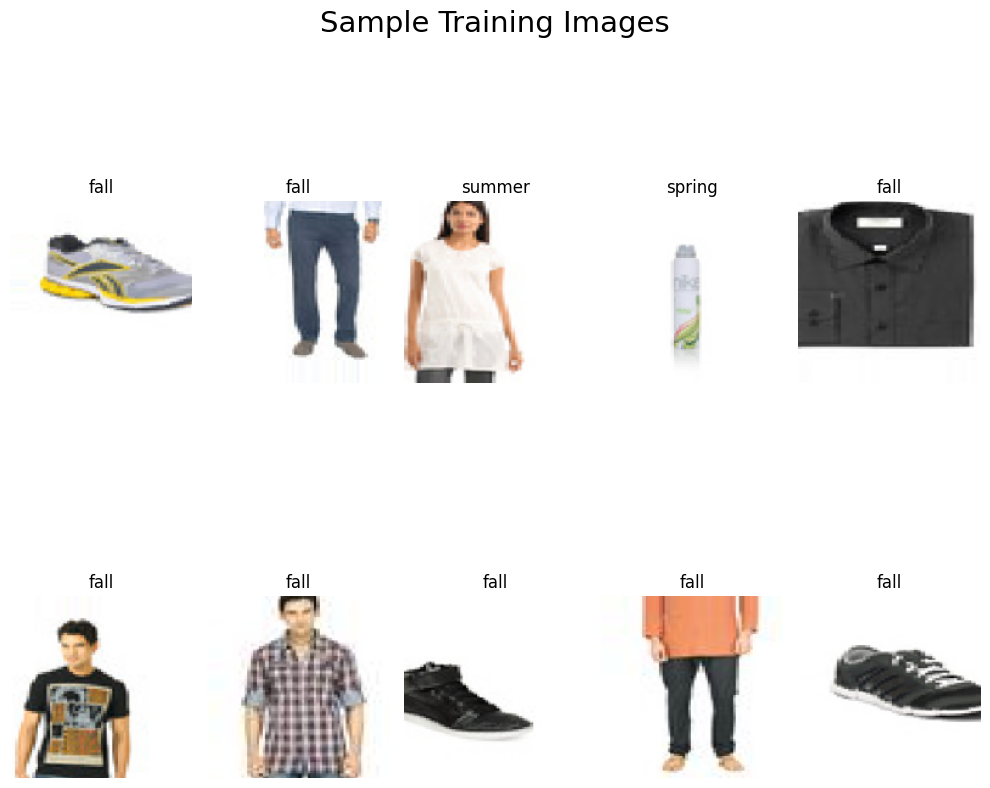

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 10))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [21]:
def create_model():
    model = Sequential([
        Conv2D(filters=128, kernel_size=(5, 5), padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=64, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Conv2D(filters=32, kernel_size=(3, 3), padding='valid', kernel_regularizer=l2(0.00005)),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2)),
        BatchNormalization(),

        Flatten(),

        Dense(units=256, activation='relu'),
        Dropout(0.5),
        Dense(units=4, activation='softmax')
    ])

    return model

In [22]:
cnn_model = create_model()

In [23]:
print(cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 146, 128)     9728      
                                                                 
 activation (Activation)     (None, 146, 146, 128)     0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 128)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 73, 73, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 activation_1 (Activation)   (None, 71, 71, 64)        0

In [24]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [25]:
optimizer = Adam(learning_rate=0.001)

In [26]:
cnn_model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [27]:
history = cnn_model.fit(train_generator, epochs=50, validation_data=validation_generator,
                       verbose=2,
                       callbacks=[reduce_lr])

Epoch 1/50
580/580 - 147s - loss: 1.2881 - accuracy: 0.5301 - val_loss: 1.1467 - val_accuracy: 0.5224 - lr: 0.0010 - 147s/epoch - 253ms/step
Epoch 2/50
580/580 - 129s - loss: 1.0401 - accuracy: 0.5944 - val_loss: 1.0318 - val_accuracy: 0.5410 - lr: 0.0010 - 129s/epoch - 223ms/step
Epoch 3/50
580/580 - 130s - loss: 0.9811 - accuracy: 0.6198 - val_loss: 1.4032 - val_accuracy: 0.5664 - lr: 0.0010 - 130s/epoch - 223ms/step
Epoch 4/50
580/580 - 126s - loss: 0.9353 - accuracy: 0.6379 - val_loss: 1.7068 - val_accuracy: 0.5259 - lr: 0.0010 - 126s/epoch - 217ms/step
Epoch 5/50
580/580 - 130s - loss: 0.9108 - accuracy: 0.6505 - val_loss: 21.6184 - val_accuracy: 0.3072 - lr: 0.0010 - 130s/epoch - 224ms/step
Epoch 6/50
580/580 - 126s - loss: 0.8880 - accuracy: 0.6635 - val_loss: 0.9644 - val_accuracy: 0.6376 - lr: 0.0010 - 126s/epoch - 216ms/step
Epoch 7/50
580/580 - 128s - loss: 0.8763 - accuracy: 0.6672 - val_loss: 2.2119 - val_accuracy: 0.5237 - lr: 0.0010 - 128s/epoch - 221ms/step
Epoch 8/50
5

In [28]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

learning_rate = history.history['lr']

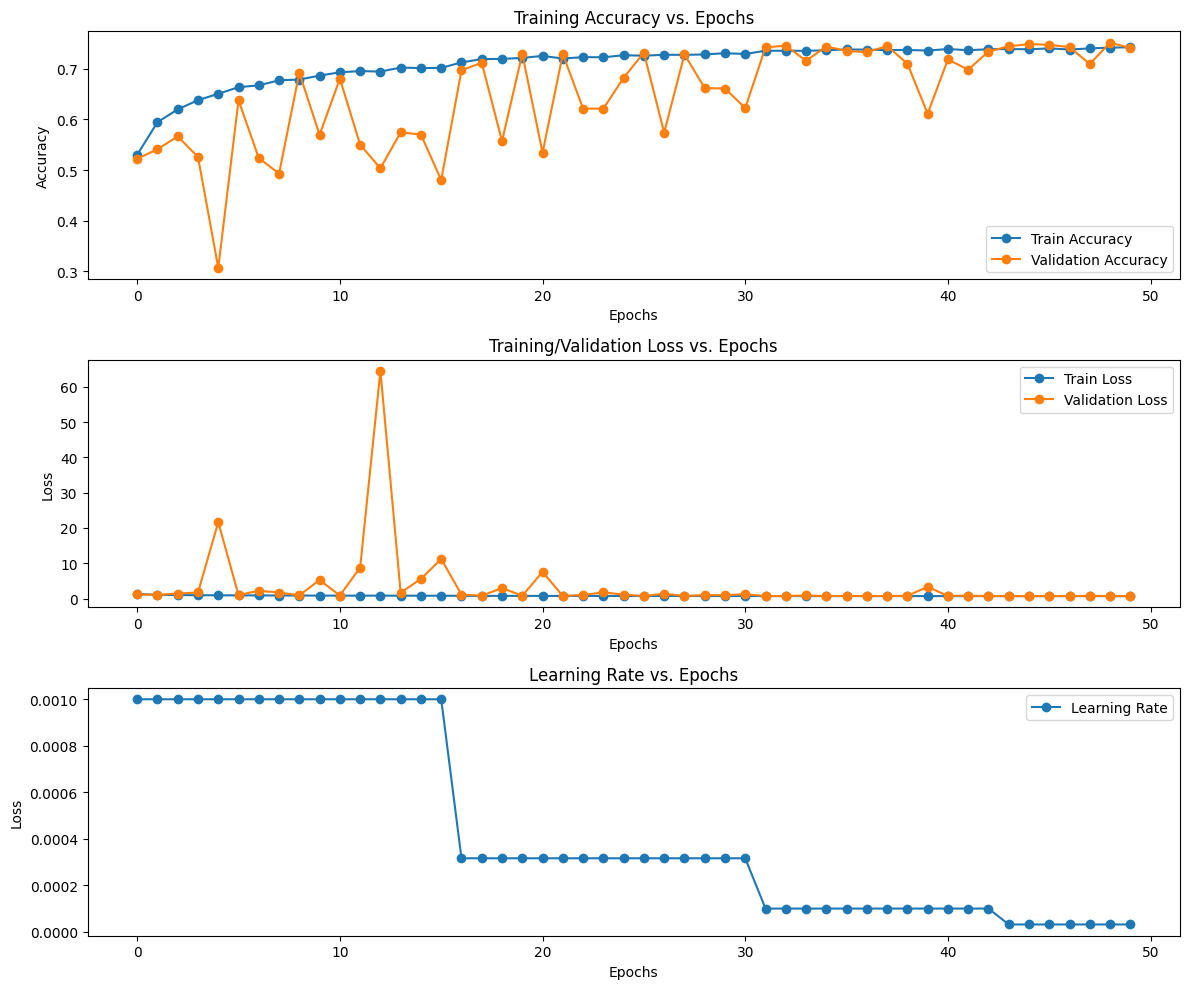

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [30]:
# Set the path to the folder where you want to save the checkpoint
checkpoint_path = "/content/drive/MyDrive/Colab_Checkpoints/season_checkpoint.ckpt"

In [32]:
# Save the model's weights and optimizer state
cnn_model.save_weights(checkpoint_path)

In [33]:
new_model = create_model()

In [34]:
new_model.load_weights(checkpoint_path)

In [35]:
test_dataset = '/content/output/test'

In [36]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 2323 images belonging to 4 classes.


In [37]:
predictions = new_model.predict(test_generator)

73/73 [==============================] - 2s 32ms/step


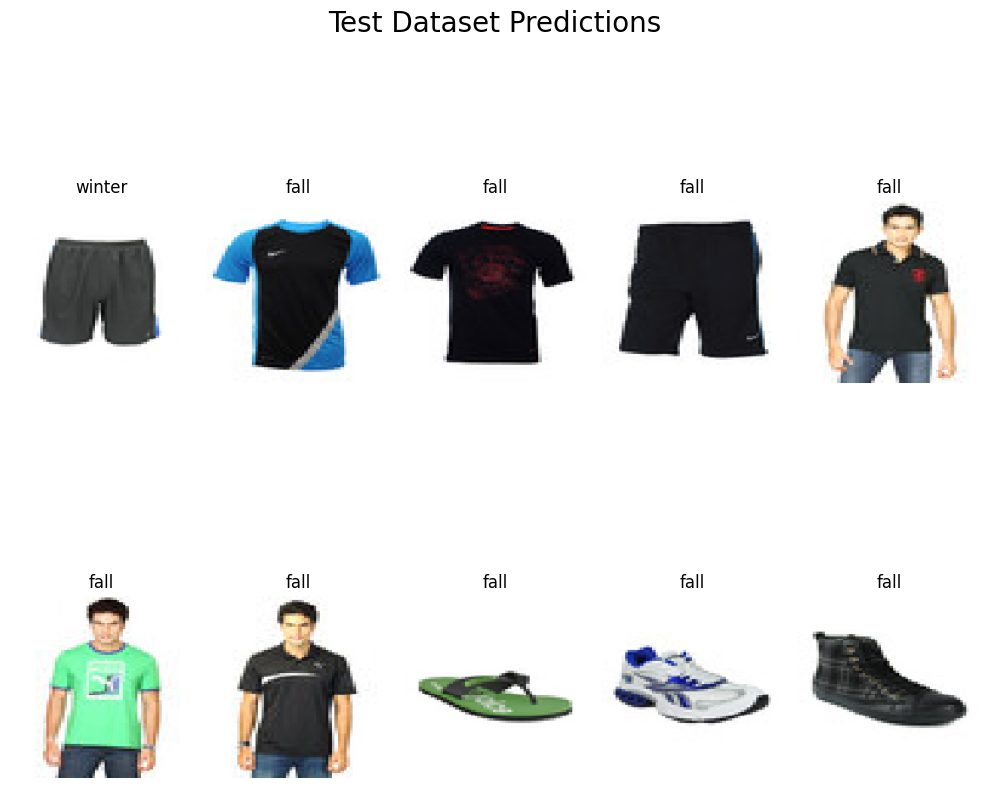

In [38]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [39]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

73/73 [==============================] - 3s 39ms/step - loss: 0.6595 - accuracy: 0.7607


In [40]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.6595242023468018
Test Accuracy: 0.7606543302536011


#Confusion Matrix

In [41]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

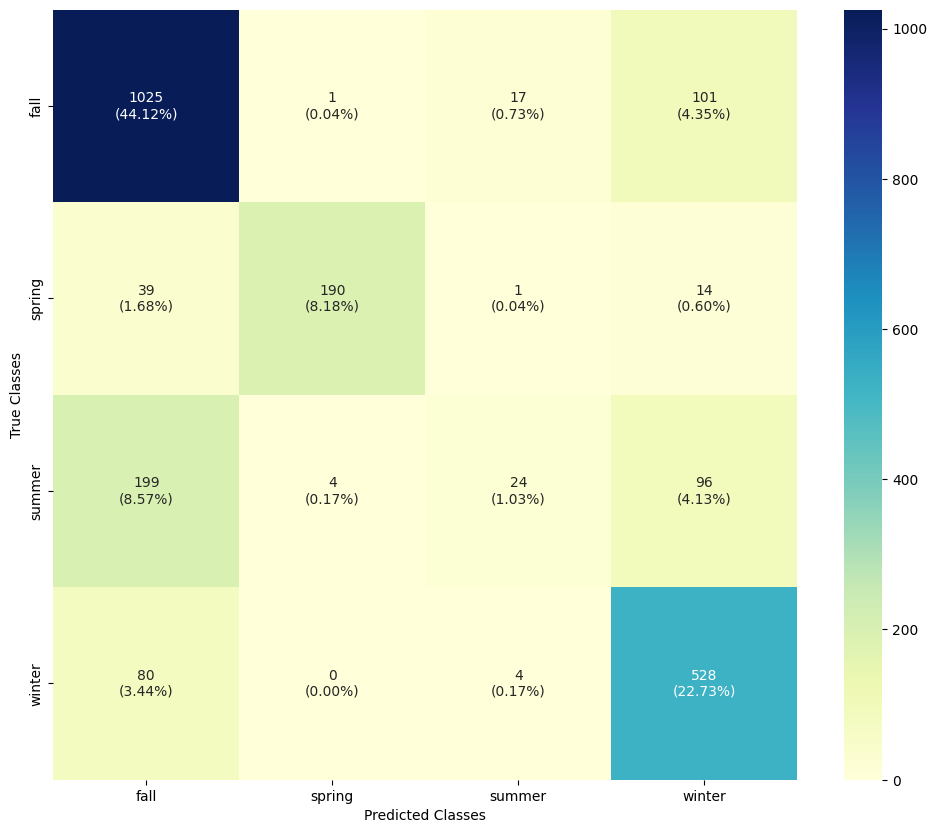

In [43]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(4, 4)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [44]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

              precision    recall  f1-score   support

        fall       0.76      0.90      0.82      1144
      spring       0.97      0.78      0.87       244
      summer       0.52      0.07      0.13       323
      winter       0.71      0.86      0.78       612

    accuracy                           0.76      2323
   macro avg       0.74      0.65      0.65      2323
weighted avg       0.74      0.76      0.72      2323



#Wrong Predictions

In [45]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]

In [46]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

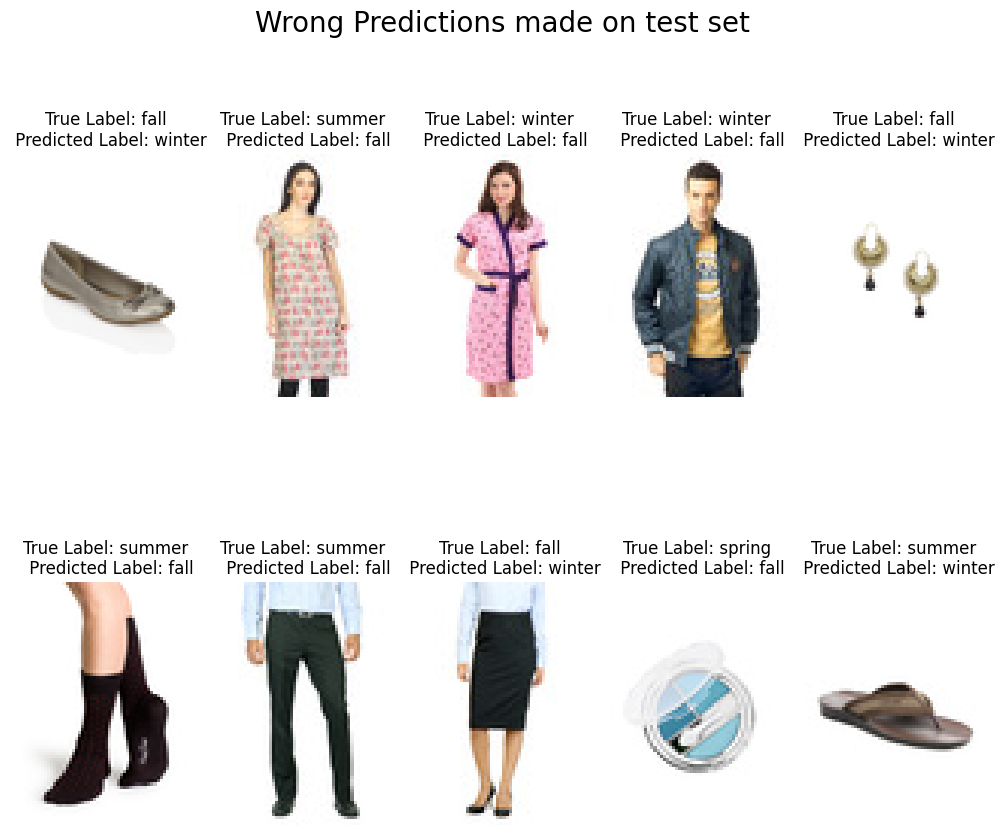

In [48]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

In [49]:
cnn_model.save("/content/drive/MyDrive/Season_Classification_Model.h5")